In [211]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_dir = 'C:\\Users\\AKHILA\\OneDrive\\Desktop\\Orange_Dataset\\train'
test_dir = 'C:\\Users\\AKHILA\\OneDrive\\Desktop\\Orange_Dataset\\test'
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

In [212]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(32, 32),
    batch_size=32,
    class_mode='sparse',
    subset='training'
)

Found 72 images belonging to 3 classes.


In [213]:
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(32, 32),
    batch_size=32,
    class_mode='sparse',
    subset='validation'
)

Found 18 images belonging to 3 classes.


In [214]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(32, 32),
    batch_size=32,
    class_mode='sparse'
)

Found 75 images belonging to 3 classes.


In [215]:
from tensorflow.keras import layers, models

def create_model(input_shape=(32, 32, 3)):
    model = models.Sequential()
    model.add(layers.Input(shape=input_shape))
    model.add(layers.Conv2D(32, (3, 3), activation='relu', strides=1, padding='valid'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(16, (3, 3), activation='relu', strides=1, padding='valid'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(3, activation='softmax'))
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0006)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

model = create_model()

In [216]:
history = model.fit(train_generator,validation_data=validation_generator,epochs=50)

Epoch 1/50


C:\Users\AKHILA\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 122ms/step - accuracy: 0.3863 - loss: 1.0869 - val_accuracy: 0.6667 - val_loss: 1.0284
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.6708 - loss: 1.0229 - val_accuracy: 0.7778 - val_loss: 0.9752
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8040 - loss: 0.9841 - val_accuracy: 1.0000 - val_loss: 0.9203
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss: 0.9174 - val_accuracy: 1.0000 - val_loss: 0.8557
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 1.0000 - loss: 0.8553 - val_accuracy: 1.0000 - val_loss: 0.7938
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9868 - loss: 0.7737 - val_accuracy: 1.0000 - val_loss: 0.7097
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9931 - loss: 0.7064 - val_accuracy: 0.9444 - val_loss: 0.6271
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9783 - loss: 0.6277 - val_accuracy: 0.9444 - val_loss: 0.5336
Epoch 9/50

In [217]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc}")
print(f"Test loss: {test_loss}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.9816 - loss: 0.0951 
Test accuracy: 0.9866666793823242
Test loss: 0.08416967839002609


In [218]:
y_test = test_generator.classes
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_test)
print(y_pred_classes)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2]
[2 0 0 0 1 0 2 1 2 2 2 1 2 0 1 0 2 0 1 1 0 2 0 0 2 0 1 2 1 0 2 1 1 0 1 1 0
 2 1 2 2 0 2 1 0 1 0 2 0 2 2 2 0 1 0 1 1 2 2 1 1 1 2 2 1 0 1 2 0 2 1 1 0 1
 0]


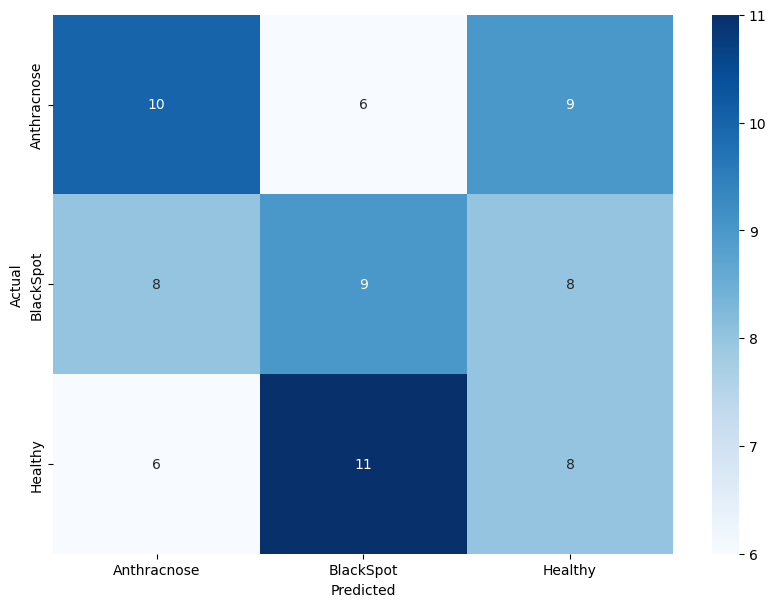

In [219]:
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Anthracnose', 'BlackSpot', 'Healthy'], yticklabels=['Anthracnose', 'BlackSpot', 'Healthy'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [220]:
print(classification_report(y_test, y_pred_classes, target_names=['Anthracnose', 'BlackSpot', 'Healthy']))

              precision    recall  f1-score   support

 Anthracnose       0.42      0.40      0.41        25
   BlackSpot       0.35      0.36      0.35        25
     Healthy       0.32      0.32      0.32        25

    accuracy                           0.36        75
   macro avg       0.36      0.36      0.36        75
weighted avg       0.36      0.36      0.36        75



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


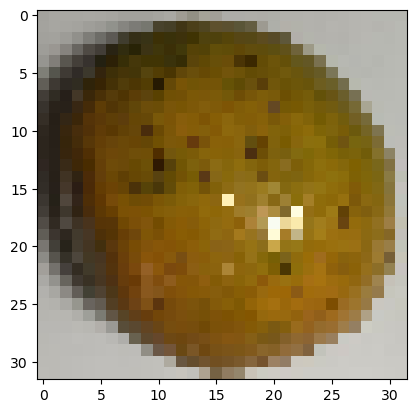

Predicted class: BlackSpot


In [221]:
from tensorflow.keras.preprocessing import image
def predict_image(model, img_path):
    img = image.load_img(img_path, target_size=(32, 32))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)
    class_labels = ['Anthracnose', 'BlackSpot', 'Healthy']
    plt.imshow(img)
    plt.show()
    return class_labels[predicted_class[0]]
img_path =  "C:\\Users\\AKHILA\\OneDrive\\Desktop\\Orange_Dataset\\test\\BlackSpot\\Blackspot_011208.jpg"
prediction = predict_image(model, img_path)
print(f"Predicted class: {prediction}")